In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import stats
import scipy
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10., 10.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

# Deep Learning

This notebook demonstrates various deep learning architectures using the MNIST data

The code uses Tensorflow / Keras, which you may need to install

In [3]:
from sklearn.datasets import fetch_openml
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
fname = 'mnist.npz'

X = np.load(fname)['X']
y = np.load(fname)['y']

In [6]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

Performing so-called "one hot" encoding on the outputs

In [7]:
y_cat_test = keras.utils.to_categorical(y_test)
y_cat_train = keras.utils.to_categorical(y_train)

In [8]:
models = {}

Below are multiple architecture examples. Try out different ones and build your own

In [9]:
# name = 'simple'

# inputs = keras.Input(shape=(X_train.shape[1],))
# h = keras.layers.Dense(128, activation="relu")(inputs)
# h = keras.layers.Dense(64, activation="relu")(h)
# h = keras.layers.Dense(32, activation="relu")(h)
# outputs = keras.layers.Dense(10, activation='softmax')(h)

# models[name] = keras.Model(inputs=inputs, outputs=outputs)

# optimizer = keras.optimizers.Adam(0.0001)

# models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# models[name].summary()

In [10]:
# name = 'dropout'

# inputs = keras.Input(shape=(X_train.shape[1],))
# h = keras.layers.Dropout(0.01)(inputs)
# h = keras.layers.Dense(128, activation="relu")(h)
# h = keras.layers.Dropout(0.01)(h)
# h = keras.layers.Dense(64, activation="relu")(h)
# h = keras.layers.Dropout(0.01)(h)
# h = keras.layers.Dense(32, activation="relu")(h)
# outputs = keras.layers.Dense(10, activation='softmax')(h)

# models[name] = keras.Model(inputs=inputs, outputs=outputs)

# optimizer = keras.optimizers.Adam(0.0001)

# models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [11]:
# name = 'batchnorm'


# inputs = keras.Input(shape=(X_train.shape[1],))
# h = keras.layers.Dense(128, activation="relu")(inputs)
# h = keras.layers.BatchNormalization()(h)
# h = keras.layers.Dense(64, activation="relu")(h)
# h = keras.layers.BatchNormalization()(h)
# h = keras.layers.Dense(32, activation="relu")(h)
# outputs = keras.layers.Dense(10, activation='softmax')(h)

# models[name] = keras.Model(inputs=inputs, outputs=outputs)

# optimizer = keras.optimizers.Adam(0.0001)

# models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [12]:
# name = 'locally connected'


# inputs = keras.Input(shape=(28, 28, 1))
# h = keras.layers.LocallyConnected2D(1,  kernel_size=(5, 5), activation="relu")(inputs)
# h = keras.layers.LocallyConnected2D(1,  kernel_size=(5, 5), activation="relu")(h)
# h = keras.layers.Flatten()(h)
# h = keras.layers.Dense(32, activation="relu")(h)
# h = keras.layers.Dense(16, activation="relu")(h)
# outputs = keras.layers.Dense(10, activation='softmax')(h)

# models[name] = keras.Model(inputs=inputs, outputs=outputs)

# optimizer = keras.optimizers.Adam(0.0001)

# models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
# name = 'cnn_simple'


# inputs = keras.Input(shape=(28, 28, 1))
# h = keras.layers.Conv2D(1,  kernel_size=(5, 5), activation="relu")(inputs)
# h = keras.layers.Conv2D(1,  kernel_size=(5, 5), activation="relu")(h)
# h = keras.layers.Flatten()(h)
# h = keras.layers.Dense(32, activation="relu")(h)
# h = keras.layers.Dense(16, activation="relu")(h)
# outputs = keras.layers.Dense(10, activation='softmax')(h)

# models[name] = keras.Model(inputs=inputs, outputs=outputs)

# optimizer = keras.optimizers.Adam(0.0001)

# models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [19]:
name = 'CNN'

inputs = keras.Input(shape=(28, 28, 1))
h = keras.layers.Conv2D(32,  kernel_size=(3, 3), activation="relu")(inputs)
h = keras.layers.MaxPool2D(pool_size=(2,2))(h)
h = keras.layers.Conv2D(64,  kernel_size=(3, 3), activation="relu")(h)
h = keras.layers.MaxPool2D(pool_size=(2,2))(h)
h = keras.layers.Conv2D(64,  kernel_size=(3, 3), activation="relu")(h)
h = keras.layers.Flatten()(h)
h = keras.layers.Dense(16, activation="relu")(h)
outputs = keras.layers.Dense(10, activation='softmax')(h)

models[name] = keras.Model(inputs=inputs, outputs=outputs)

optimizer = keras.optimizers.Adam(0.0001)

models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [20]:
models['CNN'].summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0   

In [16]:
# name = 'CNN + Dropout + Batchnorm'


# inputs = keras.Input(shape=(28, 28, 1))
# h = keras.layers.Dropout(0.01)(inputs)
# h = keras.layers.Conv2D(32,  kernel_size=(3, 3), activation="relu")(h)
# h = keras.layers.BatchNormalization()(h)
# h = keras.layers.MaxPool2D(pool_size=(2,2))(h)
# h = keras.layers.Conv2D(64,  kernel_size=(3, 3), activation="relu")(h)
# h = keras.layers.BatchNormalization()(h)
# h = keras.layers.MaxPool2D(pool_size=(2,2))(h)
# h = keras.layers.Conv2D(64,  kernel_size=(3, 3), activation="relu")(h)
# h = keras.layers.BatchNormalization()(h)
# h = keras.layers.Flatten()(h)
# h = keras.layers.Dense(16, activation="relu")(h)
# outputs = keras.layers.Dense(10, activation='softmax')(h)

# models[name] = keras.Model(inputs=inputs, outputs=outputs)

# optimizer = keras.optimizers.Adam(0.0001)

# models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# models[name].summary()

We can now train the model using several epochs (1 epoch = churning through the full dataset once)

NB: depending on the model, you need to shape the inputs differently!

Training 30 Epochs (depending on the model and your computer hardware) can take a while

In [21]:
# train 1d models (dense etc)
# models[name].fit(X_train, y_cat_train, epochs=30, validation_data=(X_test, y_cat_test), batch_size=64)

# traind 2d models (CNNs etc)
models[name].fit(X_train.reshape(-1, 28, 28, 1), y_cat_train, epochs=20, validation_data=(X_test.reshape(-1, 28, 28, 1), y_cat_test), batch_size=256)

Epoch 1/20
235/235 [==============================] - 22s 91ms/step - loss: 2.2575 - accuracy: 0.4321 - val_loss: 1.0072 - val_accuracy: 0.7121
Epoch 2/20
235/235 [==============================] - 21s 88ms/step - loss: 0.6592 - accuracy: 0.8199 - val_loss: 0.3544 - val_accuracy: 0.9050
Epoch 3/20
235/235 [==============================] - 21s 88ms/step - loss: 0.3113 - accuracy: 0.9146 - val_loss: 0.2558 - val_accuracy: 0.9290
Epoch 4/20
235/235 [==============================] - 23s 98ms/step - loss: 0.2258 - accuracy: 0.9391 - val_loss: 0.2056 - val_accuracy: 0.9437
Epoch 5/20
235/235 [==============================] - 23s 99ms/step - loss: 0.1830 - accuracy: 0.9498 - val_loss: 0.1646 - val_accuracy: 0.9532
Epoch 6/20
235/235 [==============================] - 20s 86ms/step - loss: 0.1521 - accuracy: 0.9583 - val_loss: 0.1410 - val_accuracy: 0.9600
Epoch 7/20
235/235 [==============================] - 21s 88ms/step - loss: 0.1307 - accuracy: 0.9638 - val_loss: 0.1341 - val_accuracy:

Looking at the training history can help gaining some insight and sport overfitting for example

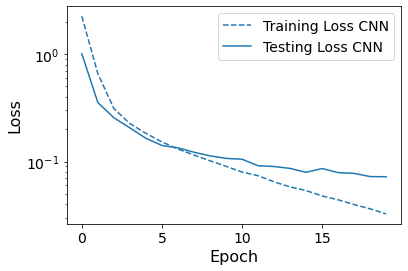

In [25]:
for name in models.keys(): #['simple', 'CNN + Dropout + Batchnorm']: #'dropout', 'batchnorm']:
    #bl = plt.plot(models[name].history.history['accuracy'], ls='--', label='Training Accuracy %s'%name)
    #plt.plot(models[name].history.history['val_accuracy'], ls='-', c=bl[0].get_color(), label='Testing Accuracy %s'%name)
    try:
        bl = plt.plot(models[name].history.history['loss'], ls='--', label='Training Loss %s'%name)
        plt.plot(models[name].history.history['val_loss'], ls='-', c=bl[0].get_color(), label='Testing Loss %s'%name)
    except AttributeError:
        pass
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss')
plt.legend()
plt.gca().set_yscale('log')

In [26]:
# predict 1d model
#y_pred = models[name].predict(X_test)

# predict 2d model
y_pred = models[name].predict(X_test.reshape(-1, 28, 28, 1))

The confusion matrix shows how good the assignement of digits to the rerspective class is

In [27]:
cm = confusion_matrix(y_test, np.argmax(y_pred,axis=1))

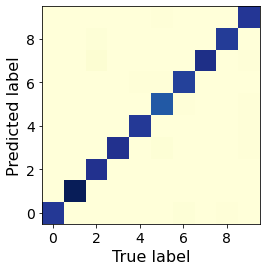

In [28]:
plt.imshow(cm.T, cmap='YlGnBu', origin='lower')
plt.gca().set_xlabel('True label')
plt.gca().set_ylabel('Predicted label')
plt.savefig('NN_consfusion_%s.png'%name, bbox_inches='tight')

-> Try out different models and architectures and compare them!

# Auto encoder

As discussed in the lecture, a different application of NNs are auto encoders.
We first look at a linear auto encoder, which just replicates our good old PCA

In [29]:
# linear

inputs = keras.Input(shape=(X_train.shape[1],))
h = keras.layers.Dense(20, activation="linear", use_bias=False)(inputs)
outputs = keras.layers.Dense(X_train.shape[1], activation='linear', use_bias=False)(h)

ae = keras.Model(inputs=inputs, outputs=outputs)

In [30]:
optimizer = keras.optimizers.Adam(0.00001)

ae.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

In [31]:
ae.fit(X, X, epochs=30, batch_size=32)

Epoch 1/30
2188/2188 [==============================] - 5s 2ms/step - loss: 6009.6543 - accuracy: 0.0025
Epoch 2/30
2188/2188 [==============================] - 4s 2ms/step - loss: 4131.9429 - accuracy: 0.0059
Epoch 3/30
2188/2188 [==============================] - 5s 2ms/step - loss: 3797.7742 - accuracy: 0.0076
Epoch 4/30
2188/2188 [==============================] - 5s 2ms/step - loss: 3462.4680 - accuracy: 0.0099
Epoch 5/30
2188/2188 [==============================] - 5s 2ms/step - loss: 3155.7871 - accuracy: 0.0115
Epoch 6/30
2188/2188 [==============================] - 5s 2ms/step - loss: 2870.7026 - accuracy: 0.0128
Epoch 7/30
2188/2188 [==============================] - 5s 2ms/step - loss: 2642.1362 - accuracy: 0.0142
Epoch 8/30
2188/2188 [==============================] - 5s 2ms/step - loss: 2472.9641 - accuracy: 0.0143
Epoch 9/30
2188/2188 [==============================] - 5s 2ms/step - loss: 2345.8477 - accuracy: 0.0151
Epoch 10/30
2188/2188 [==============================] 

In [32]:
encode = keras.Model(inputs=inputs, outputs=h)

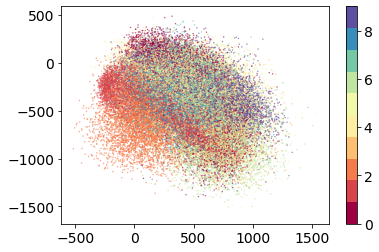

In [33]:
reduced_data = encode(X).numpy()

plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=0.1, c=y ,cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
#plt.savefig('mnist_encoded_true_labels.png', bbox_inches='tight')

And here is how our 20d recosntrcuted data looks like....pretty similar to our 20d PCA!
Exercise: compare this NN to PCA in 2d

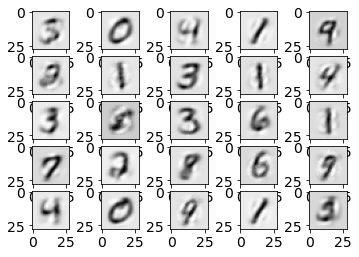

In [34]:
X_reco = ae(X).numpy()

fig, ax = plt.subplots(5,5)
for i in range(25):
    axis = ax[i//5, i%5]
    axis.imshow(X_reco[i].reshape(28,28), cmap='Greys')

## Non-linear AE

It gets much more powerful when adding back in non-linearirties

In [35]:
inputs = keras.Input(shape=(X_train.shape[1],))
encoded = keras.layers.Dense(256, activation="relu")(inputs)
encoded = keras.layers.Dense(64, activation="relu")(encoded)
encoded = keras.layers.Dense(2, activation="relu")(encoded)
decoder1 = keras.layers.Dense(64, activation="relu")
decoded = decoder1(encoded)
decoder2 = keras.layers.Dense(256, activation="relu")
decoded = decoder2(decoded)
decoder_out = keras.layers.Dense(X_train.shape[1], activation='linear')
outputs = decoder_out(decoded)

ae = keras.Model(inputs=inputs, outputs=outputs)

In [36]:
optimizer = keras.optimizers.Adam(0.001)

ae.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

In [37]:
ae.fit(X_train, X_train, epochs=30, validation_data=(X_test, X_test), batch_size=64)

Epoch 1/30
938/938 [==============================] - 5s 5ms/step - loss: 4017.7131 - accuracy: 0.0085 - val_loss: 3396.6289 - val_accuracy: 0.0177
Epoch 2/30
938/938 [==============================] - 4s 4ms/step - loss: 3277.9287 - accuracy: 0.0141 - val_loss: 3121.0242 - val_accuracy: 0.0095
Epoch 3/30
938/938 [==============================] - 4s 4ms/step - loss: 3090.6475 - accuracy: 0.0099 - val_loss: 3014.9395 - val_accuracy: 0.0097
Epoch 4/30
938/938 [==============================] - 4s 4ms/step - loss: 2994.0422 - accuracy: 0.0093 - val_loss: 2924.4089 - val_accuracy: 0.0078
Epoch 5/30
938/938 [==============================] - 6s 6ms/step - loss: 2930.7678 - accuracy: 0.0095 - val_loss: 2884.2363 - val_accuracy: 0.0116
Epoch 6/30
938/938 [==============================] - 6s 6ms/step - loss: 2899.3711 - accuracy: 0.0094 - val_loss: 2867.9136 - val_accuracy: 0.0111
Epoch 7/30
938/938 [==============================] - 6s 6ms/step - loss: 2867.9924 - accuracy: 0.0104 - val_los

We can split up our models intwo the encoder and the decoder part:

In [38]:
encode = keras.Model(inputs=inputs, outputs=encoded)

In [39]:
dec_inp = keras.Input(shape=2,)
decoded_i = decoder1(dec_inp)
decoded_i = decoder2(decoded_i)
outputs_i = decoder_out(decoded_i)
decode = keras.Model(inputs=dec_inp, outputs=outputs_i)

In [40]:
reduced_data = encode(X).numpy()
reduced_data

array([[2121.3997 ,  970.81525],
       [1384.3219 , 1736.3823 ],
       [  52.66314,  445.08978],
       ...,
       [ 637.87415, 1260.0092 ],
       [ 540.5677 ,  899.6809 ],
       [2526.0283 , 2182.7793 ]], dtype=float32)

For this 2d encoder, the digits separate much more nicely than in the PCA case, and also recosntrcuted images look fantastic

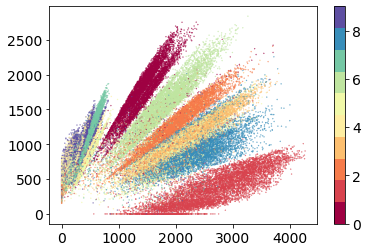

In [41]:
plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=0.1, c=y ,cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
#plt.savefig('mnist_encoded_linear_true_labels.png', bbox_inches='tight')

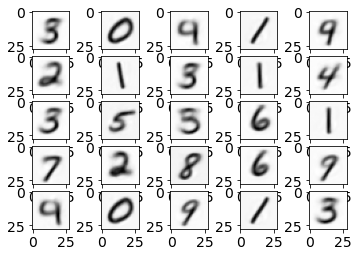

In [42]:
X_reco = ae(X)
X_plot = X_reco.numpy()

fig, ax = plt.subplots(5,5)
for i in range(25):
    axis = ax[i//5, i%5]
    axis.imshow(X_plot[i].reshape(28,28), cmap='Greys')

## Generate digits

We can try to use the decoder as a generator, and generate artidicial digits. The issue here is that this may not work very well (see lecture) and should be done via _variational_ AEs (see according notebook).

In [43]:
inp = np.array([[100., 100.],]).astype(np.float32)
o = decode(inp).numpy()

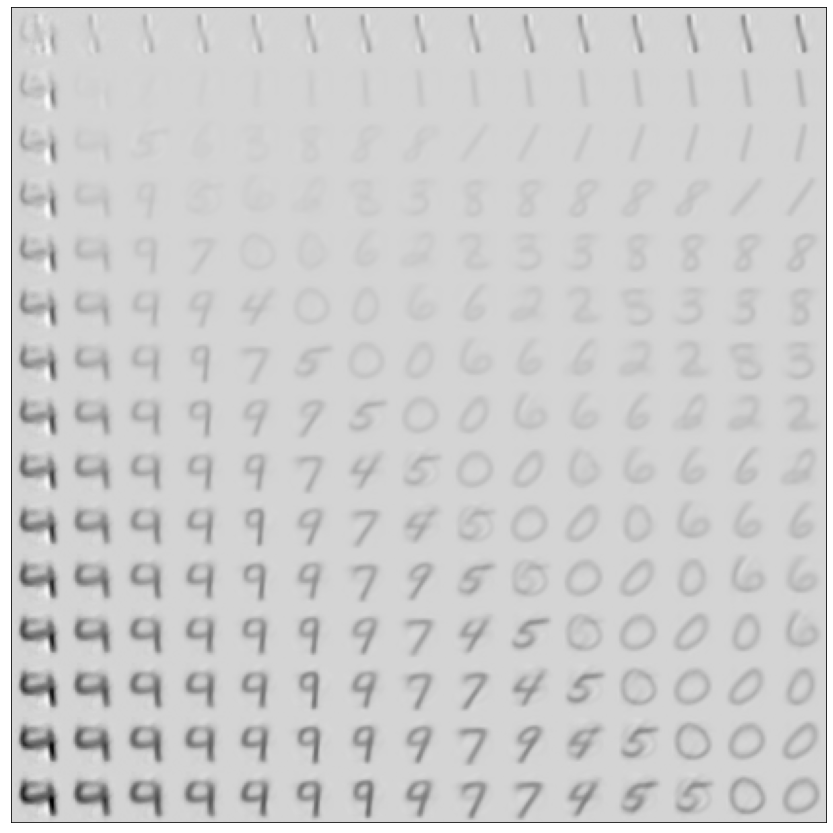

In [44]:
# display a 2D manifold of the digits
n = 15 # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-100., 1600, n)
grid_y = np.linspace(-100., 1200, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]).astype(np.float32)
        x_decoded = decode.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(15, 15))
plt.imshow(figure, cmap='Greys')

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)


#plt.savefig('AE_mnist.png', bbox_inches='tight')